In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [112]:
# 导入10年数据集
df08 = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\CSV\\2008.csv",encoding='gb18030',low_memory=False)
df09 =  pd.read_csv("C:\\Users\\Lenovo\\Desktop\\CSV\\2009.csv",encoding='gb18030',low_memory=False)
df10 =  pd.read_csv("C:\\Users\\Lenovo\\Desktop\\CSV\\2010.csv",encoding='gb18030',low_memory=False)
df11 = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\CSV\\2011.csv",encoding='gb18030',low_memory=False)
df12 = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\CSV\\2012.csv",encoding='gb18030',low_memory=False)
df13 = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\CSV\\2013.csv",encoding='gb18030',low_memory=False)
df14 = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\CSV\\2014.csv",encoding='gb18030',low_memory=False)
df15 = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\CSV\\2015.csv",encoding='gb18030',low_memory=False)
df16 = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\CSV\\2016.csv",encoding='gb18030',low_memory=False)
df17 = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\CSV\\2017.csv",encoding='gb18030',low_memory=False)
df18 = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\CSV\\2018.csv",encoding='gb18030',low_memory=False)
# 合成总数据集
df = pd.concat([df08,df09,df10,df11,df12,df13,df14,df15,df16,df17,df18],ignore_index =True)

In [113]:
len(df)

4216400

In [114]:
# 数据清洗
# 对异常值进行处理
df = df[(df.数量>0)&(df.销售价格>0)]

In [115]:
len(df)

3669206

In [189]:
df[:2]

,店铺编号,店铺简称,店铺省市,店铺地址,货号,货品名称,销售日期,颜色编号,颜色说明,尺码,吊牌价,销售价格,数量
0,SH01SH06,上海凯德七宝,上海市上海市市辖区,门行区七莘路3655号嘉贸购物中心2楼28号 ABLEJEANS专,083911026B801,POLO,2008-08-12,B801,漂白,XS,199.0,199.0,1.0
2,SH01SH06,上海凯德七宝,上海市上海市市辖区,门行区七莘路3655号嘉贸购物中心2楼28号 ABLEJEANS专,0839080032B01,裙,2008-08-11,2B01,蓝牛,XS,249.0,249.0,1.0


##### 最畅销的10种商品

In [157]:
df['货品名称'].value_counts()[:10]

牛仔长裤          1007360
短袖TEE          353692
牛仔夹克           168825
T恤              84805
COLLECTION      82701
牛仔裤             82059
羽绒服             73747
针织牛仔夹克          72300
牛仔短裤            70072
卫衣套头衫           65632
Name: 货品名称, dtype: int64

##### 以上海地区-牛仔长裤为例 进行研究

In [118]:
# 筛选出牛仔长裤 数据
df = df[df['货品名称'].isin(['牛仔长裤'])]
# 筛选上海市的产品
df = df[df['店铺省市'].isin(['上海市上海市市辖区'])]

In [119]:
len(df)

383026

In [120]:
# 删除空值
df = df.dropna(axis = 0)

In [121]:
len(df)

382372

In [122]:
# 去掉不必要的数据列
df = df.drop(['店铺编号','店铺简称','店铺省市','店铺地址','货号','货品名称'],axis = 1)

In [12]:
df[:2]

,销售日期,颜色编号,颜色说明,尺码,吊牌价,销售价格,数量
752046,2013-12-25,003,水洗古靛蓝,38,699.0,419.0,1.0
752047,2013-12-31,002,水洗深靛蓝,38,799.0,703.0,1.0


In [108]:
# df=df[df['销售价格']>4]
# len(df)
# df=df[df['数量']<=10]

In [110]:
# df['数量'].value_counts()

In [123]:
df['discount'] = df['销售价格']/(df['吊牌价']*df['数量'])   #增加折扣特征

In [124]:
len(df)

382372

In [125]:
df=df[df['discount']<=1.0]

In [126]:
len(df)

382340

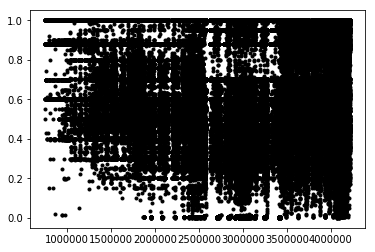

In [169]:
plt.plot(df['discount'],'k.')

In [127]:
# 认为折扣值小于2折的为异常值
# len(df[df['discount']<=0.2])
df=df[df['discount']>=0.2]

In [92]:
len(df)

376340

In [18]:
df[:2]

,销售日期,颜色编号,颜色说明,尺码,吊牌价,销售价格,数量,discount
752046,2013-12-25,003,水洗古靛蓝,38,699.0,419.0,1.0,0.599428
752047,2013-12-31,002,水洗深靛蓝,38,799.0,703.0,1.0,0.879850


In [43]:
df['颜色编号'].value_counts()

003     132105
002      52523
004      48655
021      44560
005      44538
001      17665
011      15710
012      10762
013       4258
812       3209
016       2172
014       2044
022       1033
030        866
007        685
015        604
008        498
009        284
812A       143
025         26
026         17
005A        14
015A         1
Name: 颜色编号, dtype: int64

In [44]:
df['颜色说明'].value_counts()

水洗古靛蓝    132105
水洗深靛蓝     52523
水洗浅靛蓝     48655
蓝牛暗中色     44560
水洗漂靛蓝     44538
蓝牛深色      17665
黑牛深色      15710
水洗黑       10762
水洗古黑       4258
象牙白        3352
水洗白        2172
水洗浅黑       2044
黑牛暗中色      1033
白牛原色        866
水洗灰         685
黑牛浅色        605
灰牛中色        498
水洗浅灰        284
蓝牛原色         26
黑牛原色         17
蓝牛浅色         14
Name: 颜色说明, dtype: int64

In [45]:
df['尺码'].value_counts()

26     46846
31     40122
28     38578
27     38130
32     37083
30     36735
29     36251
25     34396
33     25016
34     18583
24     17736
36      9454
38      2488
M        320
S        244
L        233
XL        84
XXL       42
XS        28
23         3
Name: 尺码, dtype: int64

In [46]:
df['吊牌价'].value_counts()# 说明有些商品的价格是重复的

799.0     180583
699.0     121770
899.0      36642
599.0      23903
999.0      10941
1099.0      3937
1199.0      3797
1499.0       656
1299.0        99
1999.0        44
Name: 吊牌价, dtype: int64

In [128]:
df['销售日期'] = pd.to_datetime(df['销售日期'], format="%Y/%m/%d")

In [129]:
df[:2]

,销售日期,颜色编号,颜色说明,尺码,吊牌价,销售价格,数量,discount
752046,2013-12-25,003,水洗古靛蓝,38,699.0,419.0,1.0,0.599428
752047,2013-12-31,002,水洗深靛蓝,38,799.0,703.0,1.0,0.879850


##### 颜色分类

In [130]:
title_Dict = {}
title_Dict.update(dict.fromkeys(['水洗灰','灰牛中色','水洗浅灰'], 'grey'))
title_Dict.update(dict.fromkeys(['水洗古靛蓝', '水洗深靛蓝', '水洗浅靛蓝', '蓝牛暗中色', '水洗漂靛蓝',
                                 '蓝牛深色','蓝牛原色','蓝牛浅色'], 'blue'))
title_Dict.update(dict.fromkeys(['黑牛深色', '水洗黑','水洗古黑','水洗浅黑','黑牛暗中色',
                                 '黑牛浅色','黑牛原色'], 'black'))
title_Dict.update(dict.fromkeys(['象牙白', '水洗白','白牛原色'], 'white'))

df['颜色说明'] = df['颜色说明'].map(title_Dict)

##### 尺码分类

In [131]:
size = {}
size.update(dict.fromkeys(['XS', 'S', '23','24', '25', '26', '27', '28', '29', '30'], 'small'))
size.update(dict.fromkeys(['M', 'L', '31', '32', '33'], 'medium'))
size.update(dict.fromkeys(['XL', 'XXL', '34', '36', '38'], 'large'))
df['尺码'] = df['尺码'].map(size)

In [132]:
df=df.drop(['颜色编号'],axis = 1)

In [98]:
df[:2]

,销售日期,颜色说明,尺码,吊牌价,销售价格,数量,discount
752046,2013-12-25,blue,large,699.0,419.0,1.0,0.599428
752047,2013-12-31,blue,large,799.0,703.0,1.0,0.879850


In [99]:
df.to_csv('data01.csv')

In [145]:
df = pd.read_csv("E:\\【ML_DL】\\【服装项目】\\0416\\上海地区-周销量\\data01.csv",encoding='utf-8',low_memory=False)

In [148]:
df=df.drop(['Unnamed: 0'],axis=1)

In [149]:
df[:2]

,销售日期,颜色说明,尺码,吊牌价,销售价格,数量,discount
0,2013-12-25,blue,large,699.0,419.0,1.0,0.599428
1,2013-12-31,blue,large,799.0,703.0,1.0,0.879850


In [150]:
# 对吊牌价  销售价格 discount 进行分段
Q1_tag_price = df['吊牌价'].quantile(0.33)
Q2_tag_price = df['吊牌价'].quantile(0.66)
Q1_sale_price = df['销售价格'].quantile(0.33)
Q2_sale_price = df['销售价格'].quantile(0.66)
Q1_discount = df['discount'].quantile(0.33)
Q2_discount = df['discount'].quantile(0.66)

In [151]:
print('吊牌价low',Q1_tag_price,'\n吊牌价high',Q2_tag_price,
      '\n销售价格low',Q1_sale_price,'\n销售价格high',Q2_sale_price,
      '\ndiscount_low',Q1_discount,'\ndiscount_high',Q2_discount)

吊牌价low 699.0 
吊牌价high 799.0 
销售价格low 400.0 
销售价格high 615.0 
discount_low 0.5007153075822603 
discount_high 0.8798283261802575


In [152]:
def price_level (x,Q1,Q2):
    if x < Q1:
        pl = 0
        return pl
    elif x < Q2:
        pl = 1
        return pl
    else:
        pl = 2
        return pl

In [153]:
df

,销售日期,颜色说明,尺码,吊牌价,销售价格,数量,discount
0,2013-12-25,blue,large,699.0,419.0,1.0,0.599428
1,2013-12-31,blue,large,799.0,703.0,1.0,0.879850
2,2013-12-29,blue,large,699.0,419.0,1.0,0.599428
3,2013-12-31,blue,large,799.0,703.0,1.0,0.879850
4,2013-12-31,blue,large,799.0,439.0,1.0,0.549437
5,2013-07-13,blue,small,799.0,479.0,1.0,0.599499
6,2013-07-18,blue,small,799.0,703.0,1.0,0.879850
7,2013-07-15,blue,small,699.0,615.0,1.0,0.879828
8,2013-07-15,blue,small,699.0,615.0,1.0,0.879828
9,2013-07-18,blue,small,799.0,799.0,1.0,1.000000


In [154]:
df['吊牌价格分段'] = df.apply(lambda x: price_level(x[3],Q1_tag_price,Q2_tag_price),axis=1)
df['销售价格分段'] = df.apply(lambda x: price_level(x[4],Q1_sale_price,Q2_sale_price),axis=1)
df['discount分段'] = df.apply(lambda x: price_level(x[6],Q1_discount,Q2_discount),axis=1)

In [155]:
df

,销售日期,颜色说明,尺码,吊牌价,销售价格,数量,discount,吊牌价格分段,销售价格分段,discount分段
0,2013-12-25,blue,large,699.0,419.0,1.0,0.599428,1,1,1
1,2013-12-31,blue,large,799.0,703.0,1.0,0.879850,2,2,2
2,2013-12-29,blue,large,699.0,419.0,1.0,0.599428,1,1,1
3,2013-12-31,blue,large,799.0,703.0,1.0,0.879850,2,2,2
4,2013-12-31,blue,large,799.0,439.0,1.0,0.549437,2,1,1
5,2013-07-13,blue,small,799.0,479.0,1.0,0.599499,2,1,1
6,2013-07-18,blue,small,799.0,703.0,1.0,0.879850,2,2,2
7,2013-07-15,blue,small,699.0,615.0,1.0,0.879828,1,2,2
8,2013-07-15,blue,small,699.0,615.0,1.0,0.879828,1,2,2
9,2013-07-18,blue,small,799.0,799.0,1.0,1.000000,2,2,2


In [158]:
# 添加价格等地对应的数量
# 吊牌价格分段
# 销售价格分段
# discount
df['吊牌价格_低'] = df.apply(lambda x : x[5] if x[7]==0 else 0, axis=1 )
df['吊牌价格_中'] = df.apply(lambda x: x[5] if x[7]==1 else 0, axis=1 )
df['吊牌价格_高'] = df.apply(lambda x : x[5] if x[7]==2 else 0, axis=1 )

In [160]:
df['销售价格_低'] = df.apply(lambda x : x[5] if x[8]==0 else 0, axis=1 )
df['销售价格_中'] = df.apply(lambda x: x[5] if x[8]==1 else 0, axis=1 )
df['销售价格_高'] = df.apply(lambda x : x[5] if x[8]==2 else 0, axis=1 )

In [161]:
df['discount_低'] = df.apply(lambda x : x[5] if x[9]==0 else 0, axis=1 )
df['discount_中'] = df.apply(lambda x: x[5] if x[9]==1 else 0, axis=1 )
df['discount_高'] = df.apply(lambda x : x[5] if x[9]==2 else 0, axis=1 )

In [163]:
df[:10]

,销售日期,颜色说明,尺码,吊牌价,销售价格,数量,discount,吊牌价格分段,销售价格分段,discount分段,吊牌价格_低,吊牌价格_中,吊牌价格_高,销售价格_低,销售价格_中,销售价格_高,discount_低,discount_中,discount_高
0,2013-12-25,blue,large,699.0,419.0,1.0,0.599428,1,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2013-12-31,blue,large,799.0,703.0,1.0,0.879850,2,2,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2013-12-29,blue,large,699.0,419.0,1.0,0.599428,1,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2013-12-31,blue,large,799.0,703.0,1.0,0.879850,2,2,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,2013-12-31,blue,large,799.0,439.0,1.0,0.549437,2,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
5,2013-07-13,blue,small,799.0,479.0,1.0,0.599499,2,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
6,2013-07-18,blue,small,799.0,703.0,1.0,0.879850,2,2,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
7,2013-07-15,blue,small,699.0,615.0,1.0,0.879828,1,2,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,2013-07-15,blue,small,699.0,615.0,1.0,0.879828,1,2,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,2013-07-18,blue,small,799.0,799.0,1.0,1.000000,2,2,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [164]:
df = df.drop(['吊牌价格分段','销售价格分段','discount分段'],axis=1)

In [166]:
df[:10]

,销售日期,颜色说明,尺码,吊牌价,销售价格,数量,discount,吊牌价格_低,吊牌价格_中,吊牌价格_高,销售价格_低,销售价格_中,销售价格_高,discount_低,discount_中,discount_高
0,2013-12-25,blue,large,699.0,419.0,1.0,0.599428,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2013-12-31,blue,large,799.0,703.0,1.0,0.879850,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2013-12-29,blue,large,699.0,419.0,1.0,0.599428,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2013-12-31,blue,large,799.0,703.0,1.0,0.879850,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,2013-12-31,blue,large,799.0,439.0,1.0,0.549437,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
5,2013-07-13,blue,small,799.0,479.0,1.0,0.599499,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
6,2013-07-18,blue,small,799.0,703.0,1.0,0.879850,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
7,2013-07-15,blue,small,699.0,615.0,1.0,0.879828,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,2013-07-15,blue,small,699.0,615.0,1.0,0.879828,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,2013-07-18,blue,small,799.0,799.0,1.0,1.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [167]:
df.to_csv('data02.csv')